In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("./data_src/DelayedFlights.csv", nrows=250000)

#### Haciendo una tabla de frecuencias

In [42]:
df.Diverted.value_counts()

0    248970
1      1030
Name: Diverted, dtype: int64

### Usando matplotlib para una gráfica de tarta (Pie Chart)

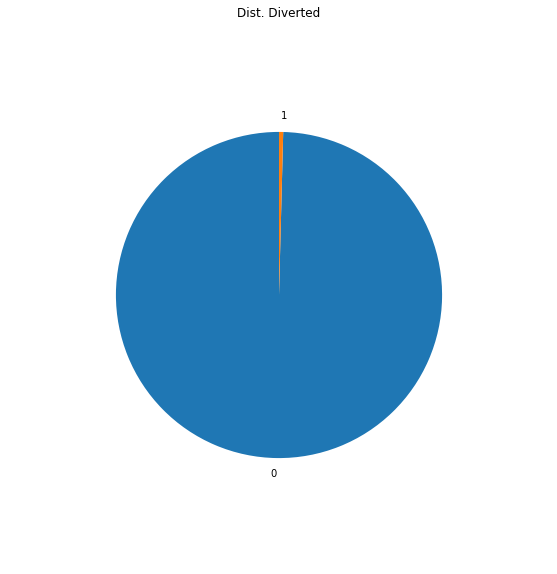

In [43]:
plt.figure(figsize=(10,10))

plt.pie(x=df.Diverted.value_counts().tolist(),
        labels=df.Diverted.value_counts().index.tolist(),
        startangle=90,
        radius=0.75)
plt.title("Dist. Diverted")
plt.show()

In [49]:
df.groupby(by="DayOfWeek")["DepDelay"].mean()

DayOfWeek
1    47.181555
2    47.716790
3    42.197743
4    42.802154
5    41.730381
6    39.617865
7    44.468018
Name: DepDelay, dtype: float64

In [125]:
df.groupby(by="DayOfWeek")["ArrDelay"].mean()

DayOfWeek
1    46.981156
2    48.414410
3    40.561092
4    42.914430
5    40.318696
6    37.495477
7    42.462688
Name: ArrDelay, dtype: float64

### Usando Matplotlib para crear varios grafiquitos y darles formato

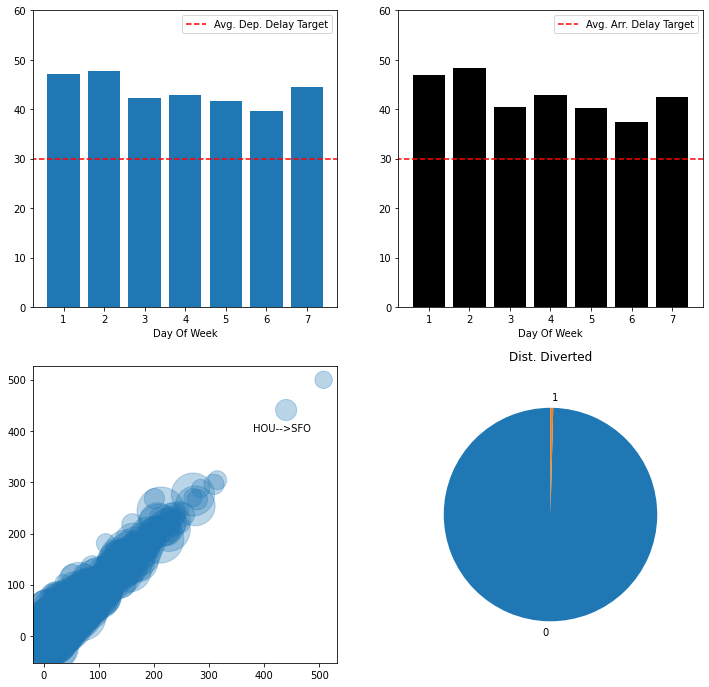

In [126]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
p1 = df.groupby(by="DayOfWeek")["DepDelay"].mean()
plt.bar(x=p1.index.tolist(), height=p1.values.tolist())
plt.plot(np.arange(0,9), np.ones(9)*30, 'r--', label="Avg. Dep. Delay Target")

plt.xlabel("Day Of Week")
plt.ylim([0,60])
plt.xlim([0.25,7.75])
plt.legend();



plt.subplot(2,2,2)
p2 = df.groupby(by="DayOfWeek")["ArrDelay"].mean()
plt.bar(x=p2.index.tolist(), height=p2.values.tolist(), color="black")
plt.plot(np.arange(0,9), np.ones(9)*30, 'r--', label="Avg. Arr. Delay Target")

plt.xlabel("Day Of Week")
plt.ylim([0,60])
plt.xlim([0.25,7.75])
plt.legend();

plt.subplot(2,2,3)
plt.scatter(x=df.DepDelay[:5000],
            y=df.ArrDelay[:5000],
            s=df.Distance[:5000],
            alpha=0.3)
plt.text(380,400,"HOU-->SFO")


plt.subplot(2,2,4)
plt.pie(x=df.Diverted.value_counts().tolist(),
        labels=df.Diverted.value_counts().index.tolist(),
        startangle=90,
        radius=0.9)
plt.title("Dist. Diverted");

### Formateando con Matplotlib y Seaborn Palette

**IMPORTANTE**

Seaborn está construido sobre Matplotlib :))

In [127]:
import seaborn as sns

In [167]:
df.DayOfWeek.value_counts()

4    44838
5    38662
2    38339
3    37756
7    33738
1    33560
6    23107
Name: DayOfWeek, dtype: int64

In [174]:
df.DayOfWeek.value_counts()/len(df)

4    0.179352
5    0.154648
2    0.153356
3    0.151024
7    0.134952
1    0.134240
6    0.092428
Name: DayOfWeek, dtype: float64

In [176]:
# El orden de esta lista está pareado con el orden en el que aparecen los DoW en el .value_counts(), considerando:
#
# 1: Lunes
# 7: Domingo

dias_semana = ["Thu", "Fri", "Tue", "Wed", "Sun", "Mon", "Sat"]

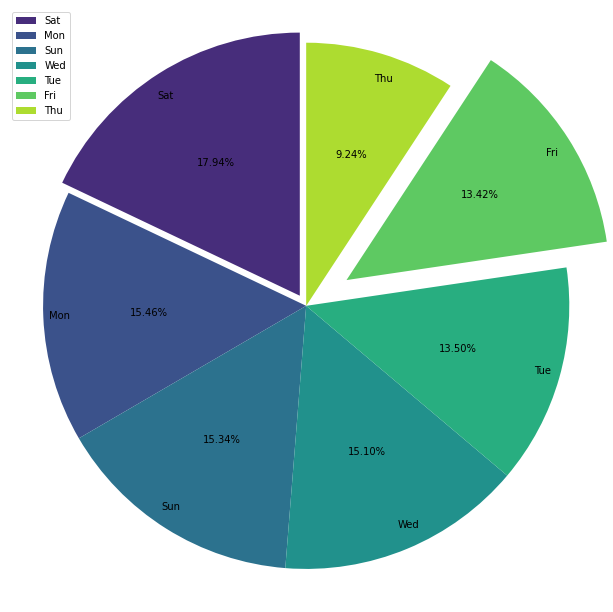

In [188]:
plt.figure(figsize=(11,11))

plt.pie(x=df.DayOfWeek.value_counts().values,
        #labels=df.DayOfWeek.value_counts().index,
        labels=dias_semana[::-1],
        radius=1.1,
        colors = sns.color_palette("viridis", 7), ## color_palette("nombre_paleta", num_colores_diferentes_que_necesitamos)
        explode=(0.05,0,0,0,0,0.2,0), # Para separar un poco los quesitos
        startangle=90,
        autopct="%1.2f%%", # Permite colocar los porcentajes de share dentro de cada quesito
        labeldistance = 0.9 # Permite parametrizar la distancia a la que se colocará, en este caso, Mon, Tue en cada quesito
       )
plt.legend(loc="upper left")

plt.show();

### Nuestro primer gráfico de Seaborn

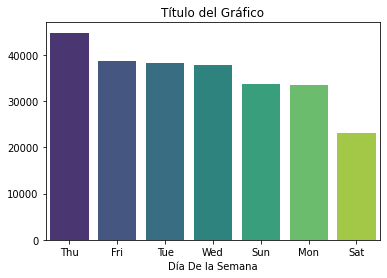

In [202]:
plot_sns = sns.barplot(x = dias_semana,
                  y = df.DayOfWeek.value_counts().values,
                  palette = "viridis"
                # palette = sns.color_palette("viridis", 7)
                 )

plot_sns.set(title="Título del Gráfico", xlabel="Día De la Semana");
